# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\Users\sanket\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sanket\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[round(num_test/2):], newsgroups_test.target[round(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:round(num_test/2)], newsgroups_test.target[:round(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):

### STUDENT START ###
    for i in range(0,num_examples):
        print("Training Sample %d: Category : %s"%(i, newsgroups_train.target_names[train_labels[i]]))
        print("")
        print(train_data[i])
        print("-------------------------------------------------------")
    
### STUDENT END ###

P1()

Training Sample 0: Category : comp.graphics

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
-------------------------------------------------------
Training Sample 1: Category : talk.religion.misc



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.




(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():

### STUDENT START ###
    # initialize CountVectorizer
    vectorizer = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None)

    # fit_transform training set
    train_data_features = vectorizer.fit_transform(train_data)
    
    #get the shape of the feature set and non-zero elements using "shape" and "nnz" variables
    print("Question a)")
    print("Size of vocabulary is %d" % train_data_features.shape[1])
    print("Average number of non-zero features per example : %f" %(train_data_features.nnz/train_data_features.shape[0]))
    print("Fraction of entries in the matrix that are non-zero: %f" % (train_data_features.nnz/(train_data_features.shape[0] * train_data_features.shape[1])))
    
    print("Question b)")
    print("Oth feature string: %s" % vectorizer.get_feature_names()[0])
    print("Last feature string: %s" % vectorizer.get_feature_names()[-1])
    
    # initialize 2nd CountVectorizer with custom Vocabulary
    vectorizer2 = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None,
                             vocabulary= ["atheism","graphics","space","religion"])
    train_data_features2 = vectorizer2.fit_transform(train_data)
    shape2 = train_data_features2.shape
    
    print("Question c)")
    print("Shape of training set " , train_data_features2.shape)
    print("Average number of non-zero features per example : %f" %(train_data_features2.nnz/train_data_features2.shape[0]))
    
    # initialize 2nd CountVectorizer with bi-gram features
    vectorizer_bigram = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None,
                             ngram_range= (1,2))
    train_data_features_bigram = vectorizer_bigram.fit_transform(train_data)
    
    # initialize 2nd CountVectorizer with tri-gram features
    vectorizer_trigram = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None,
                            ngram_range= (1,3))
    train_data_features_trigram = vectorizer_trigram.fit_transform(train_data)
    
    print("Question d)")
    print("Vocabulary size with bigram features : %d" % train_data_features_bigram.shape[1])
    print("Vocabulary size with trigram features : %d" % train_data_features_trigram.shape[1])
    
    #initialize CountVectorizer witn min_df = 0.005
    vectorizer_mindf = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 0.005)

    # fit_transform training set
    train_data_features_mindf = vectorizer_mindf.fit_transform(train_data)
    print("Question e)")
    print("Vocabulary size with \"min_df\" argument to prune words that appear in fewer than 10 documents  : %d" % train_data_features_mindf.shape[1])
    
    
    vectorizer_dev = CountVectorizer(analyzer= "word",
                            tokenizer= None,
                            preprocessor = None,
                            stop_words = None)

    # transform dev_data
    dev_data_features = vectorizer_dev.fit_transform(dev_data)

    # get vocabulary for train_data
    train_voc = vectorizer.get_feature_names()
    #get vocabulary for dev_data
    dev_voc = vectorizer_dev.get_feature_names()
    
    #select words from dev_data vocabulary if its not present in train_data vocabulary
    diff = [x for x in dev_voc if x not in train_voc ]
    
    print("Question f)")
    print("Size of vocabulary difference between train and dev data is : %d" % len(diff))
    
### STUDENT END ###

P2()

Question a)
Size of vocabulary is 26879
Average number of non-zero features per example : 96.705998
Fraction of entries in the matrix that are non-zero: 0.003598
Question b)
Oth feature string: 00
Last feature string: zyxel
Question c)
Shape of training set  (2034, 4)
Average number of non-zero features per example : 0.268437
Question d)
Vocabulary size with bigram features : 221770
Vocabulary size with trigram features : 537462
Question e)
Vocabulary size with "min_df" argument to prune words that appear in fewer than 10 documents  : 2816
Question f)
Size of vocabulary difference between train and dev data is : 4027


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

Vocabulary Size:  26879
KNeighborsClassifier : Optimal value of K: 151
KNeighborsClassifier Score : 0.450344
MultinomialNB : Optimal value of alpha: 0.010000
MultinomialNB Score : 0.828417
LogisticRegression : Optimal value of C: 0.100000
LogisticRegression Score : 0.766470


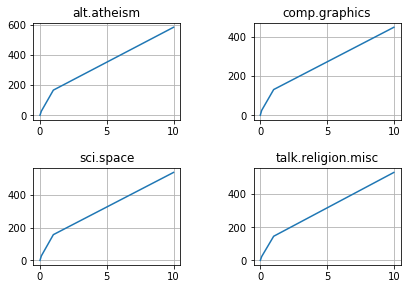

In [5]:
def P3():

### STUDENT START ###
    #initialize CountVectorizer
    vectorizer_train = CountVectorizer()
    train_data_features= vectorizer_train.fit_transform(train_data)
    
    print("Vocabulary Size: ",len(vectorizer_train.get_feature_names()))
    
    #parameter to be searched for 
    grid_k = { 'n_neighbors': [i for i in range(1,200)] }
    
    #initialize grid search for KNeighborsClassifier
    kn_gs = GridSearchCV(KNeighborsClassifier(), grid_k, n_jobs = -1)
    kn_gs.fit(train_data_features, train_labels)
    
    print("KNeighborsClassifier : Optimal value of K: %d" % kn_gs.best_params_['n_neighbors'] )
    print("KNeighborsClassifier Score : %f" % kn_gs.best_score_ )
    
    grid_nb = { 'alpha': np.power(10.0, np.arange(-10, 10)) }
    
    #initialize grid search for MultinomialNB
    nb_gs = GridSearchCV(MultinomialNB(), grid_nb, n_jobs = -1)
    nb_gs.fit(train_data_features, train_labels)
    
    print("MultinomialNB : Optimal value of alpha: %f" % nb_gs.best_params_['alpha'] )
    print("MultinomialNB Score : %f" % nb_gs.best_score_ )
    
    grid_lr = { 'C': np.power(10.0, np.arange(-10, 10)) }
    
    #initialize grid search for LogisticRegression
    lr_gs = GridSearchCV(LogisticRegression(), grid_lr, n_jobs = -1)
    lr_gs.fit(train_data_features, train_labels)
    
    print("LogisticRegression : Optimal value of C: %f" % lr_gs.best_params_['C'] )
    print("LogisticRegression Score : %f" % lr_gs.best_score_ )
    
    c_arr = []
    cat_arr = []
    
    # function to calculate square
    square = lambda x: x**2
    
    # run logistic regression for different values of C and calculate f1 score
    for c in np.power(10.0, np.arange(-4,2)):
        lr = LogisticRegression(C= c)
        lr.fit(train_data_features, train_labels)
        temp =[]
        for i in range(0,lr.coef_.shape[0]):
            temp.append(sum([square(x) for x in lr.coef_[i]]))
        cat_arr.append(temp)
        c_arr.append(c)
    
    plt.figure(1)
    
    # plot the chart for C vs f1
    for i in range(0,4):
        plt.subplot(221 + i)
        plt.plot(c_arr, np.array(cat_arr)[:,i])
        plt.title(newsgroups_train.target_names[i])
        plt.grid(True) 
        
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.50)

### STUDENT END ###

P3()

ANSWER:
a)NearestBeighbor probably doesnt work well most texts share similar words and therefore different catageory texts could be clustered closely resulting in incorrect predictions.

b) The feature size for the train set is 26879. NB being a high bias classifier is better at generalizing while LogisticRegression tends to overfitt .

c) From the graph we can see that for all categories as C increases the sum of the squared weight values increases

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
def P4():

### STUDENT START ###
    # initialize Count Vectorizer with default values
    unigram_vectorizer = CountVectorizer()
    #initialize CountVectorizer with bigram features
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
    
    train_data_features_uni= unigram_vectorizer.fit_transform(train_data)
    train_data_features_bi= bigram_vectorizer.fit_transform(train_data)
    
    lr_uni = LogisticRegression( C=0.1)
    lr_uni.fit(train_data_features_uni,train_labels)
    
    lr_bi = LogisticRegression( C=0.1)
    lr_bi.fit(train_data_features_bi,train_labels)
    
    #get feature names for unigram and bigram features
    features_uni = unigram_vectorizer.get_feature_names()
    features_bi = bigram_vectorizer.get_feature_names()
    
    #get the top 5 features based on the learned weights
    class0_top5_uni = [ i[0] for i in sorted(enumerate(lr_uni.coef_[0]), key=lambda x: x[1], reverse=True)][:5]
    class1_top5_uni = [ i[0] for i in sorted(enumerate(lr_uni.coef_[1]), key=lambda x: x[1], reverse=True)][:5]
    class2_top5_uni = [ i[0] for i in sorted(enumerate(lr_uni.coef_[2]), key=lambda x: x[1], reverse=True)][:5]
    class3_top5_uni = [ i[0] for i in sorted(enumerate(lr_uni.coef_[3]), key=lambda x: x[1], reverse=True)][:5]
    
    #get top 5 features for bigram vectorizer based on the learned weights
    class0_top5_bi = [ i[0] for i in sorted(enumerate(lr_bi.coef_[0]), key=lambda x: x[1], reverse=True)][:5]
    class1_top5_bi = [ i[0] for i in sorted(enumerate(lr_bi.coef_[1]), key=lambda x: x[1], reverse=True)][:5]
    class2_top5_bi = [ i[0] for i in sorted(enumerate(lr_bi.coef_[2]), key=lambda x: x[1], reverse=True)][:5]
    class3_top5_bi = [ i[0] for i in sorted(enumerate(lr_bi.coef_[3]), key=lambda x: x[1], reverse=True)][:5]
    
    #print features in table format
    print("Top 5 features with unigram vectorization")
    print('-'*93)
    print("|",newsgroups_train.target_names[0].ljust(20),"|",
         newsgroups_train.target_names[1].ljust(20),"|",
         newsgroups_train.target_names[2].ljust(20),"|",
         newsgroups_train.target_names[3].ljust(20),"|",)
    print('-'*93)
    print('-'*93)
    for i in range(0,4):
        print("|",np.array(features_uni)[class0_top5_uni[i]].ljust(20),"|",
         np.array(features_uni)[class1_top5_uni[i]].ljust(20),"|",
         np.array(features_uni)[class2_top5_uni[i]].ljust(20),"|",
         np.array(features_uni)[class3_top5_uni[i]].ljust(20),"|",)
        print('-'*93)
        
    print()
    
    print("Top 5 features with bigram vectorization")
    print('-'*93)
    print("|",newsgroups_train.target_names[0].ljust(20),"|",
         newsgroups_train.target_names[1].ljust(20),"|",
         newsgroups_train.target_names[2].ljust(20),"|",
         newsgroups_train.target_names[3].ljust(20),"|",)
    print('-'*93)
    print('-'*93)
    for i in range(0,4):
        print("|",np.array(features_bi)[class0_top5_bi[i]].ljust(20),"|",
         np.array(features_bi)[class1_top5_bi[i]].ljust(20),"|",
         np.array(features_bi)[class2_top5_bi[i]].ljust(20),"|",
         np.array(features_bi)[class3_top5_bi[i]].ljust(20),"|",)
        print('-'*93)
        
### STUDENT END ###

P4()

Top 5 features with unigram vectorization
---------------------------------------------------------------------------------------------
| alt.atheism          | comp.graphics        | sci.space            | talk.religion.misc   |
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
| atheism              | graphics             | space                | christian            |
---------------------------------------------------------------------------------------------
| religion             | image                | orbit                | christians           |
---------------------------------------------------------------------------------------------
| bobby                | file                 | nasa                 | blood                |
---------------------------------------------------------------------------------------------
| atheists        

ANSWER: fbi showing up in top 5 features for religion seems a bit surprising. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    text = replace_numerals(remove_shorter_words(remove_duplicate_chars(remove_special_chars((lowercase(s))))));
    text = re.sub("\\s+", " ", text)
    text = re.sub("^\\s", "", text)
    text = re.sub("\\s$", "", text)
    return text

### STUDENT START ###

#lowercase text
def lowercase(text):
    return text.lower()

# only remove specia characters
def remove_special_chars(text):
    return re.sub('[^0-9a-z]', ' ', text)

#replace consecutive numerals with _N
def replace_numerals(text):
    return re.sub('\d{2,}','_N',text)

# remove duplicate characters
def remove_duplicate_chars(text):
    return re.sub('([[:alpha:]])\\1+', '\\1\\1', text)

# remove words shorter than 4 characters
def remove_shorter_words(s):
    return re.sub(r'\b\w{1,3}\b', '', s)

### STUDENT END ###


def P5():

### STUDENT START ###
    # initialize count vectorizer with default parameters 
    empty_vectorizer = CountVectorizer()
    empty_train_data_features= empty_vectorizer.fit_transform(train_data)
    empty_dev_data_features= empty_vectorizer.transform(dev_data)
    
    # initialize count vectorizer with custom preprocessor
    pre_process_vectorizer = CountVectorizer(
                            tokenizer= None,
                            preprocessor = better_preprocessor,
                            #stop_words = 'english',
                           # min_df = 0.005,
                            lowercase = True)
    
    pre_train_data_features= pre_process_vectorizer.fit_transform(train_data)
    pre_dev_data_features= pre_process_vectorizer.transform(dev_data)
    
    c= 0.1
    lr_empty = LogisticRegression( C= c)
    lr_empty.fit(empty_train_data_features,train_labels)

    lr_empty_pred = lr_empty.predict(empty_dev_data_features)

    print("Vocab length (Default CountVectorizer): ", len(empty_vectorizer.get_feature_names()))
    print("F1 score (Default CountVectorizer): ",metrics.f1_score(dev_labels,lr_empty_pred, average= "micro"))

    lr_pre = LogisticRegression( C = c)
    lr_pre.fit(pre_train_data_features,train_labels)

    lr_pre_pred = lr_pre.predict(pre_dev_data_features)
    print("Vocab length (Default CountVectorizer): ", len(pre_process_vectorizer.get_feature_names()))
    print("F1 score (Default CountVectorizer): ",metrics.f1_score(dev_labels,lr_pre_pred, average= "micro"))

### STUDENT END ###

P5()

Vocab length (Default CountVectorizer):  26879
F1 score (Default CountVectorizer):  0.704142011834
Vocab length (Default CountVectorizer):  22443
F1 score (Default CountVectorizer):  0.720414201183


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

new shape: (2034, 9)
C=  0.01  f1=  0.44674556213
new shape: (2034, 178)
C=  0.1  f1=  0.680473372781
new shape: (2034, 1006)
C=  1  f1=  0.680473372781
new shape: (2034, 2720)
C=  10  f1=  0.680473372781
new shape: (2034, 6980)
C=  100  f1=  0.668639053254
new shape: (2034, 19880)
C=  1000  f1=  0.653846153846
new shape: (2034, 22372)
C=  10000  f1=  0.665680473373


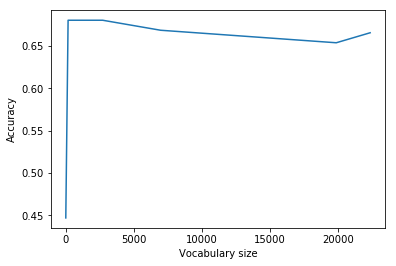

In [9]:
import scipy.sparse as sp
def P6():

    # Keep this random seed here to make comparison easier.
    #np.random.seed(0)

    ### STUDENT START ###
    # create Count Vectorizer
    pre_process_vectorizer = CountVectorizer(preprocessor = better_preprocessor)
    
    # Vectorizer Train and Dev data
    pre_train_data_features= pre_process_vectorizer.fit_transform(train_data)
    pre_dev_data_features= pre_process_vectorizer.transform(dev_data)
    # arrays to hold values of C and corresponding values of accuracy
    c_val = []
    acc_val = []
    # test for C values in the range (10**-2, 10**5) in steps of x10
    for i in range(-2,5):
        c = 10**i
        #train logistic regression with "l1" penalty
        lr = LogisticRegression(penalty='l1', C= c,tol=.01)
        #we will use the Vectorized feature set from previous step
        lr.fit(pre_train_data_features,train_labels)
        #get predictions for dev data
        lr_pred = lr.predict(pre_dev_data_features)
        
        #find features with at least 1 non-zero weight. 
        non_zero = np.where(lr.coef_.any(axis=0))[0]
        
        #extract the non_zero features and re assign training and dev features
        f_arr = pre_train_data_features.toarray()
        d_arr = pre_dev_data_features.toarray()

        t_arr=[]
        td_arr = []
        for i in range(f_arr.shape[0]):
            t_arr.append( f_arr[i][non_zero])

        for i in range(d_arr.shape[0]):
            td_arr.append(d_arr[i][non_zero])

        pre_train_data_features_trim = sp.csr_matrix(np.array(t_arr))
        pre_dev_data_features_trim = sp.csr_matrix(np.array(td_arr))
        
        print("new shape:" ,pre_train_data_features_trim.shape)
        
        ## retrain logistic regression with trimmed feature set 
        lr_trim = LogisticRegression(penalty='l2', C= c,tol=.01)
        lr_trim.fit(pre_train_data_features_trim,train_labels)

        lr_trim_pred = lr_trim.predict(pre_dev_data_features_trim)
        acc = metrics.f1_score(dev_labels,lr_trim_pred, average= 'micro')
        print("C= ",c, " f1= ",acc)
        c_val.append(pre_train_data_features_trim.shape[1])
        acc_val.append(acc)
        
    #plot C vs Accuracy values
    plt.plot(c_val,acc_val)
    plt.xlabel('Vocabulary size')
    plt.ylabel('Accuracy')
    plt.show()
        
    ### STUDENT END ###
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [73]:
def P7():

### STUDENT START ###
    tfidf = TfidfVectorizer(preprocessor = better_preprocessor)
    tfidf_train_data_features= tfidf.fit_transform(train_data)
    tfidf_dev_data_features= tfidf.transform(dev_data)
    
    lr_tf = LogisticRegression(penalty='l2', C= 100)
    lr_tf.fit(tfidf_train_data_features,train_labels)
    
    tf_pred_proba = lr_tf.predict_proba(tfidf_dev_data_features)
    tf_pred = lr_tf.predict(tfidf_dev_data_features)

    r=[]
    for pred, label in zip(tf_pred_proba,dev_labels):
        r.append(max(pred)/pred[label])
     
    print("F1 Score: ",metrics.f1_score(dev_labels,tf_pred, average= 'micro'))
    print()
    top3_r = [ i[0] for i in sorted(enumerate(r), key=lambda x: x[1], reverse=True)][:3]
    
    for i in top3_r:
        print(i)
        print("Maximum predicted probability / predicted probability ratio: ",r[i])
        print("Actual Label: ",newsgroups_train.target_names[dev_labels[i]])
        print("Predicted Label: ",newsgroups_train.target_names[tf_pred[i]])
        print("Predicted probability: ",max(tf_pred_proba[i]))
        print("Actual Label probability: ",tf_pred_proba[i][dev_labels[i]])
        print("Original Data string:")
        print()
        print(dev_data[i])
    
    top100_r = [ i[0] for i in sorted(enumerate(tfidf_dev_data_features[215].toarray()[0]), key=lambda x: x[1], reverse=True)][:100]
    
    print()
    print("Word, tf-idf , coefficient")
    for word, td, co in zip(np.array(tfidf.get_feature_names())[top100_r],np.array(tfidf_dev_data_features[215].toarray()[0])[top100_r],np.array(lr_tf.coef_[2])[top100_r]) :
        if(co > 00):
            print(word,"  ",td," ",co)
## STUDENT END ###

P7()

F1 Score:  0.776627218935

215
Maximum predicted probability / predicted probability ratio:  1904.94018449
Actual Label:  talk.religion.misc
Predicted Label:  comp.graphics
Predicted probability:  0.989904262355
Actual Label probability:  0.000519651100028
Original Data string:

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use

ANSWER: For record 215 the actual label is talk.religion.misc , while the predicted label is graphics. From the word, tfidf and coeffient for the predicted label of the top 100 words we can see that  lot of common words with positive weight are likely to be used in articles related to graphics. like error, profit, copies, corrected, rich etc.

Few things we can try are removing stop-words, bigrams. Also information about Part Of Speech of the word could help with improving the predictions.

We will try removing stop_words and add bigrams. It should at least reduct the Maximum predicted probability / predicted probability ratio

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [74]:
def P7():

### STUDENT START ###
    tfidf = TfidfVectorizer(preprocessor = better_preprocessor, stop_words = 'english', ngram_range= (1,2))
    tfidf_train_data_features= tfidf.fit_transform(train_data)
    tfidf_dev_data_features= tfidf.transform(dev_data)
    
    lr_tf = LogisticRegression(penalty='l2', C= 100)
    lr_tf.fit(tfidf_train_data_features,train_labels)
    
    tf_pred_proba = lr_tf.predict_proba(tfidf_dev_data_features)
    tf_pred = lr_tf.predict(tfidf_dev_data_features)

    r=[]
    for pred, label in zip(tf_pred_proba,dev_labels):
        r.append(max(pred)/pred[label])
     
    print("F1 Score: ",metrics.f1_score(dev_labels,tf_pred, average= 'micro'))
    print()
    top3_r = [ i[0] for i in sorted(enumerate(r), key=lambda x: x[1], reverse=True)][:3]
    
    for i in top3_r:
        print(i)
        print("Maximum predicted probability / predicted probabilit ration: ",r[i])
        print("Actual Label: ",newsgroups_train.target_names[dev_labels[i]])
        print("Predicted Label: ",newsgroups_train.target_names[tf_pred[i]])
        print("Predicted probability: ",max(tf_pred_proba[i]))
        print("Actual Label probability: ",tf_pred_proba[i][dev_labels[i]])
        print("Original Data string:")
        print()
    
  
   
## STUDENT END ###

P7()

F1 Score:  0.776627218935

215
Maximum predicted probability / predicted probabilit ration:  939.702021927
Actual Label:  talk.religion.misc
Predicted Label:  comp.graphics
Predicted probability:  0.990715819551
Actual Label probability:  0.00105428720641
Original Data string:

607
Maximum predicted probability / predicted probabilit ration:  181.969520057
Actual Label:  alt.atheism
Predicted Label:  sci.space
Predicted probability:  0.644059408958
Actual Label probability:  0.00353938070924
Original Data string:

287
Maximum predicted probability / predicted probabilit ration:  153.013839988
Actual Label:  alt.atheism
Predicted Label:  talk.religion.misc
Predicted probability:  0.96961979195
Actual Label probability:  0.00633681104941
Original Data string:

